In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd  /content/drive/MyDrive/HW2


/content/drive/MyDrive/HW2


دانلود دیتاست فقط برای بار اول

In [3]:
# prompt: how to download file from https://drive.google.com/file/d/1f5FYQWZUKVSrroAz1_RkW2DrfHKj-tAZ/view?usp=drive_link and extract in  /content/drive/MyDrive/HW2

# Install gdown if not already installed
# !pip install gdown

# Create the destination directory if it doesn't exist
# !mkdir -p /content/drive/MyDrive/HW2

# Download the file using gdown
# !gdown https://drive.google.com/uc?id=1f5FYQWZUKVSrroAz1_RkW2DrfHKj-tAZ -O /content/drive/MyDrive/HW2/downloaded_file.zip

# Change to the destination directory
# %cd /content/drive/MyDrive/HW2

# # Extract the contents of the zip file
# !unzip downloaded_file.zip

# # Remove the zip file after extraction (optional)
# !rm downloaded_file.zip

# # List the contents to see the extracted files
# !ls -l

# print("File downloaded and extracted successfully in /content/drive/MyDrive/HW2!")

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
import os
import random
import numpy as np
import tensorflow as tf



def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

set_seed(42)


In [6]:
train_folder = "/content/drive/MyDrive/HW2/Data/train"
valid_folder = "/content/drive/MyDrive/HW2/Data/valid"
test_folder = "/content/drive/MyDrive/HW2/Data/test"

In [7]:
input_shape = (224,224,3)
num_classes = 4

# Image Data Generators for test

test_datagen = ImageDataGenerator(dtype='float32')
train_datagen = ImageDataGenerator(dtype='float32')
valid_datagen=ImageDataGenerator(dtype='float32')


test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle = False,
)


Found 315 images belonging to 4 classes.


In [8]:
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_folder,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import RandomRotation

rotation_layer = RandomRotation(factor=30/360)
def augment_image(image):
    if tf.random.uniform(()) < 0.2:
        image = tf.image.random_crop(image, size=[210, 210, 1])
        image = tf.image.resize(image, [224, 224])
    if tf.random.uniform(()) < 0.2:
        image = tf.image.flip_up_down(image)
    if tf.random.uniform(()) < 0.2:
        image = tf.image.flip_left_right(image)
    # if tf.random.uniform(()) < 0.2:
    #     with tf.device('/CPU:0'):
    #         image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    if tf.random.uniform(()) < 0.2:
        image = rotation_layer(tf.expand_dims(image, 0))
        image = tf.squeeze(image, 0)
    return image



train_datagen_2 = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=augment_image
)
train_generator_2 = train_datagen_2.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-11427d08d7c8>", line 26, in <cell line: 0>
    train_generator_2 = train_datagen_2.flow_from_directory(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 1138, in flow_from_directory
    return DirectoryIterator(
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 453, in __init__
    for subdir in sorted(os.listdir(directory)):
                         ^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/HW2/Data/train'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224,1)),
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),


    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(.5),
    Dense(4, activation='softmax')
])


model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224,1)),
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(.5),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history=model1.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator
)

loss, accuracy = model1.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")




/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 275s 27s/step - accuracy: 0.2675 - loss: 38.5445 - val_accuracy: 0.3750 - val_loss: 1.3520
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 646ms/step - accuracy: 0.4331 - loss: 1.2120 - val_accuracy: 0.5139 - val_loss: 1.1111
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 538ms/step - accuracy: 0.6243 - loss: 0.9133 - val_accuracy: 0.6528 - val_loss: 0.7771
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 648ms/step - accuracy: 0.7812 - loss: 0.5662 - val_accuracy: 0.7361 - val_loss: 0.6036
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 598ms/step - accuracy: 0.9034 - loss: 0.3267 - val_accuracy: 0.6806 - val_loss: 0.9179
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 553ms/step - accuracy: 0.8806 - loss: 0.3590 - val_accuracy: 0.7778 - val_loss: 0.5790
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 657ms/step - accuracy: 0.9379 - loss: 0.1991 - val_accuracy: 0.7639 - val_loss: 0.6561
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.9837 - loss: 0.0911 - val_accuracy

In [ ]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2=model2.fit(
    train_generator_2,
    epochs=20,
    validation_data=valid_generator
)

loss, accuracy = model2.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")




Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.2612 - loss: 27.4697 - val_accuracy: 0.1806 - val_loss: 1.5455
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3533 - loss: 1.2886 - val_accuracy: 0.5000 - val_loss: 1.1150
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4885 - loss: 1.0990 - val_accuracy: 0.5278 - val_loss: 1.4060
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5887 - loss: 1.0510 - val_accuracy: 0.6528 - val_loss: 0.8266
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6580 - loss: 0.8342 - val_accuracy: 0.7222 - val_loss: 0.7297
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7237 - loss: 0.6713 - val_accuracy: 0.5972 - val_loss: 0.7547
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7197 - loss: 0.6873 - val_accuracy: 0.7361 - val_loss: 0.7893
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7910 - loss: 0.5787 - val_accuracy: 0.7083 - val_loss

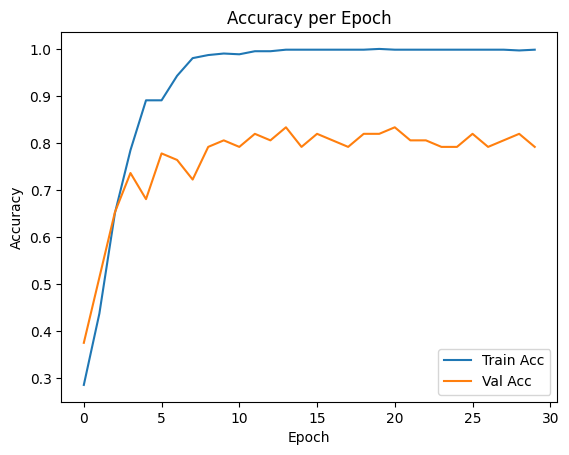

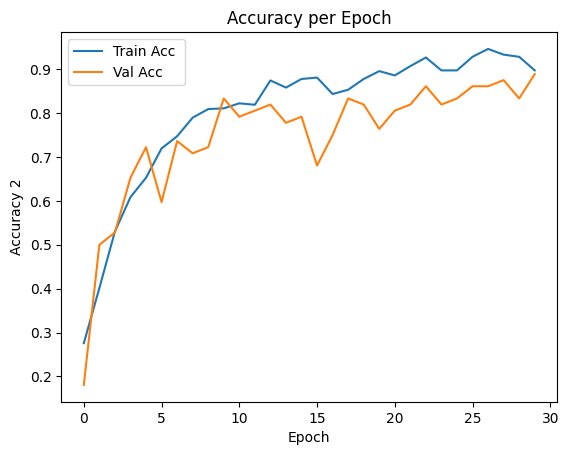

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()


plt.plot(history2.history['accuracy'], label='Train Acc ')
plt.plot(history2.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy 2')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import torch.optim as optim
from torchsummary import summary

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-3d8f3de474d4>", line 1, in <cell line: 0>
    import torch
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1138, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1078, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1507, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1476, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1434, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    st

In [ ]:
def set_seed_torch(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed_torch(42)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-820aa916a6b2>", line 11, in <cell line: 0>
    set_seed_torch(42)
  File "<ipython-input-9-820aa916a6b2>", line 4, in set_seed_torch
    torch.manual_seed(seed)
    ^^^^^
NameError: name 'torch' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    

In [ ]:
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
  transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # تبدیل به RGB
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(root=train_folder, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = datasets.ImageFolder(root=valid_folder, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder(root=test_folder, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)



In [ ]:
model = models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = False




In [ ]:
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

summary(model, input_size=(3, 224, 224), device=str(device))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
def evaluate_model(model, dataloader, name="Validation"):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

    acc = 100 * correct / total
    print(f"{name} Accuracy: {acc:.2f}%")
    return acc




In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()


    print(f"Epoch {epoch+1} - Loss: {running_loss:.4f}, Accuracy: {100.*correct/total:.2f}%")
    evaluate_model(model, val_loader, name="Validation")


Epoch 1 - Loss: 25.7234, Accuracy: 42.41%
Validation Accuracy: 23.61%
Epoch 2 - Loss: 18.7030, Accuracy: 64.11%
Validation Accuracy: 47.22%
Epoch 3 - Loss: 16.2347, Accuracy: 69.33%
Validation Accuracy: 43.06%
Epoch 4 - Loss: 15.3265, Accuracy: 70.15%
Validation Accuracy: 61.11%
Epoch 5 - Loss: 13.5338, Accuracy: 81.89%
Validation Accuracy: 65.28%
Epoch 6 - Loss: 12.5081, Accuracy: 78.30%
Validation Accuracy: 65.28%
Epoch 7 - Loss: 11.7853, Accuracy: 82.22%
Validation Accuracy: 63.89%
Epoch 8 - Loss: 10.8297, Accuracy: 82.38%
Validation Accuracy: 61.11%
Epoch 9 - Loss: 10.8032, Accuracy: 83.52%
Validation Accuracy: 66.67%
Epoch 10 - Loss: 10.0013, Accuracy: 83.85%
Validation Accuracy: 66.67%
Epoch 11 - Loss: 9.3189, Accuracy: 86.30%
Validation Accuracy: 65.28%
Epoch 12 - Loss: 9.4577, Accuracy: 86.62%
Validation Accuracy: 63.89%
Epoch 13 - Loss: 9.6181, Accuracy: 85.32%
Validation Accuracy: 66.67%
Epoch 14 - Loss: 9.1596, Accuracy: 84.01%
Validation Accuracy: 59.72%
Epoch 15 - Loss: 8.

In [ ]:
evaluate_model(model, test_loader, name="Test")

Test Accuracy: 69.21%


69.2063492063492